<a href="https://colab.research.google.com/github/cb3628/Machine-learning-school-project/blob/main/ChristineBurt_CB3628_DSCI_632_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSCI 632 Final
## Name: Christine Burt
## Quarter: Winter 2024
## Professor: Chris Blackden

This Notebook is not self contained, it expects the kaggle.json api token file to be located in the user's Google Drive here:

My Drive/kaggle/kaggle.json


---

# Section 1: Define and describe the dataset:
My personal motivation for this project stems from my sister's battle with Multiple Sclerosis (MS). MS is a chronic, inflammatory disease that disrupts the central nervous system, causing a wide range of symptoms like muscle weakness, fatigue, and vision problems. Witnessing the limitations MS placed on her life has left a lasting impact. I specifically recall her describing the initial Clinically Isolated Syndrome (CIS) event, which can mimic MS symptoms but is a single episode. The extended period before receiving a formal MS diagnosis delayed her treatment, which could have slowed the progression of the disease.

This experience has fueled a desire to understand how to predict the conversion of CIS to MS. A dataset like the Multiple Sclerosis Disease Conversion Predictors of Clinically Isolated Syndrome(CIS) to Multiple Sclerosis on Kaggle could be instrumental in this pursuit. The dataset can be found here: https://www.kaggle.com/datasets/desalegngeb/conversion-predictors-of-cis-to-multiple-sclerosis

By leveraging machine learning on this data, perhaps we can identify individuals most susceptible to MS progression after a CIS event. This could lead to earlier diagnoses and potentially slow the course of the disease, offering an improved quality of life for those affected by MS.

## My Hypotheses
Prior to investigating the predictors of disease conversion from Clinically Isolated Syndrome (CIS) to Multiple Sclerosis (MS), a couple of hypotheses come to mind:
- MS is a disease that causes lesions on the brain, I wonder if the MRI Abnormalities will serve as a significant indicator of MS progression.
- According to John Hopkins, MS afflicts 4 times more females over males (https://www.hopkinsmedicine.org/health/conditions-and-diseases/multiple-sclerosis-ms/multiple-sclerosis-why-are-women-more-at-risk) I am interested to see if the data will also show this gender disparity.


## Analysis Plan:
Below is my plan for analyzing the Multiple Sclerosis Disease dataset to see if a model can accurately predict a future diagnosis of MS:
- Preprocess the data:
-- Analyse features only keeping those that seem promising for predicting MS
-- remove rows that contain null values or unknowns
-- use exploratory data analysis to understand the characteristics of the dataset
-- Create any necessary new columns to classify data or simplify data
- Analyse the processed data:
-- Train a Random Forest model
-- Conduct clustering
- Evaluate Results

## Initial analysis of columns in my dataset:

|Feature|Analysis of Features for MS Prediction|Potential Yes/No
|:--- |:------------------ |:--- |
|_c0|This is unique value for each row of data|No|
|Gender|Gender could be a factor in predicting MS|Yes|
|Age|Age could be a factor in predicting MS|Yes|
|Schooling|It doesn't seem like schooling would impact whether or not an individual would end up with an MS diagnosis|No|
|Breast Feeding|Most of these values are unknown and abviously would only be a valid question for those with a gender of female|No|
|Varicella|Could be a factor in predicting MS|Yes|
|Initial_Symptom|Could be a factor in predicting MS|Yes|
|Mono_or_Polysymptomatic|This is kind of redundant and also captured in the Initial_Symptom column|No|
|Oligoclonal_Bands|Could be a factor in predicting MS|Yes|
|LLSSEP|Could a factor in predicting MS|Yes|
|ULSSEP|Could a factor in predicting MS|Yes|
|VEP|Could a factor in predicting MS|Yes|
|BAEP|Could a factor in predicting MS|Yes|
|Periventricular_MRI|Could a factor in predicting MS|Yes|
|Cortical_MRI|Could a factor in predicting MS|Yes|
|Infratentorial_MRI|Could a factor in predicting MS|Yes|
|Spinal_Cord_MRI|Could a factor in predicting MS|Yes|
|Initial_EDSS|This is used in assessing individual diagnosed with MS|No|
|Final_EDSS|This is used in assessing individual diagnosed with MS|No|
|group|This is the target feature denoting whether or not the person ended up being diagnosed with MS|No|

## Read in the data and display the schema:

In [ ]:
#Mount my Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle'

In [ ]:
#download the dataset from kaggle
!kaggle datasets download -d desalegngeb/conversion-predictors-of-cis-to-multiple-sclerosis


  0% 0.00/3.02k [00:00<?, ?B/s]
100% 3.02k/3.02k [00:00<00:00, 4.43MB/s]


In [ ]:
import zipfile

# path to my zip file
file_path = '/content/conversion-predictors-of-cis-to-multiple-sclerosis.zip'

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/gdrive/MyDrive/kaggle') #put the file where I want it to be

In [ ]:
# Install Spark 3.5.0
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

# Install Findspark
!pip install -q findspark

import findspark
findspark.init()

## creating a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Final').getOrCreate()

In [ ]:
#Load the Dataset CSV file into an RDD

csv_file_path = '/content/gdrive/MyDrive/kaggle/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv'

# Convert RDD to DataFrame and use printSchema()
df = spark.read.csv(csv_file_path, header=True, inferSchema=True, ignoreLeadingWhiteSpace=True, ignoreTrailingWhiteSpace=True)
df.show(20)
print("Schema of the DataFrame:")
df.printSchema()

+---+------+---+---------+-------------+---------+---------------+-----------------------+-----------------+------+------+---+----+-------------------+------------+------------------+---------------+------------+----------+-----+
|_c0|Gender|Age|Schooling|Breastfeeding|Varicella|Initial_Symptom|Mono_or_Polysymptomatic|Oligoclonal_Bands|LLSSEP|ULSSEP|VEP|BAEP|Periventricular_MRI|Cortical_MRI|Infratentorial_MRI|Spinal_Cord_MRI|Initial_EDSS|Final_EDSS|group|
+---+------+---+---------+-------------+---------+---------------+-----------------------+-----------------+------+------+---+----+-------------------+------------+------------------+---------------+------------+----------+-----+
|  0|     1| 34|       20|            1|        1|              2|                      1|                0|     1|     1|  0|   0|                  0|           1|                 0|              1|           1|         1|    1|
|  1|     1| 61|       25|            3|        2|             10|              

## Using Spark SQL, show the range of values:

In [ ]:
#Show the range of values for each feature

# Register the DataFrame as a temporary view
df.createOrReplaceTempView("mdd")

# List of columns in the DataFrame
columns = df.columns

# Dictionary to store the range of values for each column
value_ranges = {}

# Iterate over each column and compute the min and max values
for column in columns:
    min_max = spark.sql(f"SELECT MIN({column}), MAX({column}) FROM mdd").collect()[0]
    min_value = min_max[0]
    max_value = min_max[1]
    value_ranges[column] = (min_value, max_value)

# Display the range of values for each column
for column, (min_value, max_value) in value_ranges.items():
    print(f"Column: {column}, Range: {min_value} to {max_value}")

Column: _c0, Range: 0 to 272
Column: Gender, Range: 1 to 2
Column: Age, Range: 15 to 77
Column: Schooling, Range: 0 to 25
Column: Breastfeeding, Range: 1 to 3
Column: Varicella, Range: 1 to 3
Column: Initial_Symptom, Range: 1 to 15
Column: Mono_or_Polysymptomatic, Range: 1 to 3
Column: Oligoclonal_Bands, Range: 0 to 2
Column: LLSSEP, Range: 0 to 1
Column: ULSSEP, Range: 0 to 1
Column: VEP, Range: 0 to 1
Column: BAEP, Range: 0 to 1
Column: Periventricular_MRI, Range: 0 to 1
Column: Cortical_MRI, Range: 0 to 1
Column: Infratentorial_MRI, Range: 0 to 1
Column: Spinal_Cord_MRI, Range: 0 to 1
Column: Initial_EDSS, Range: 1 to 3
Column: Final_EDSS, Range: 1 to 3
Column: group, Range: 1 to 2


## Create a Heatmap to find correlations between features

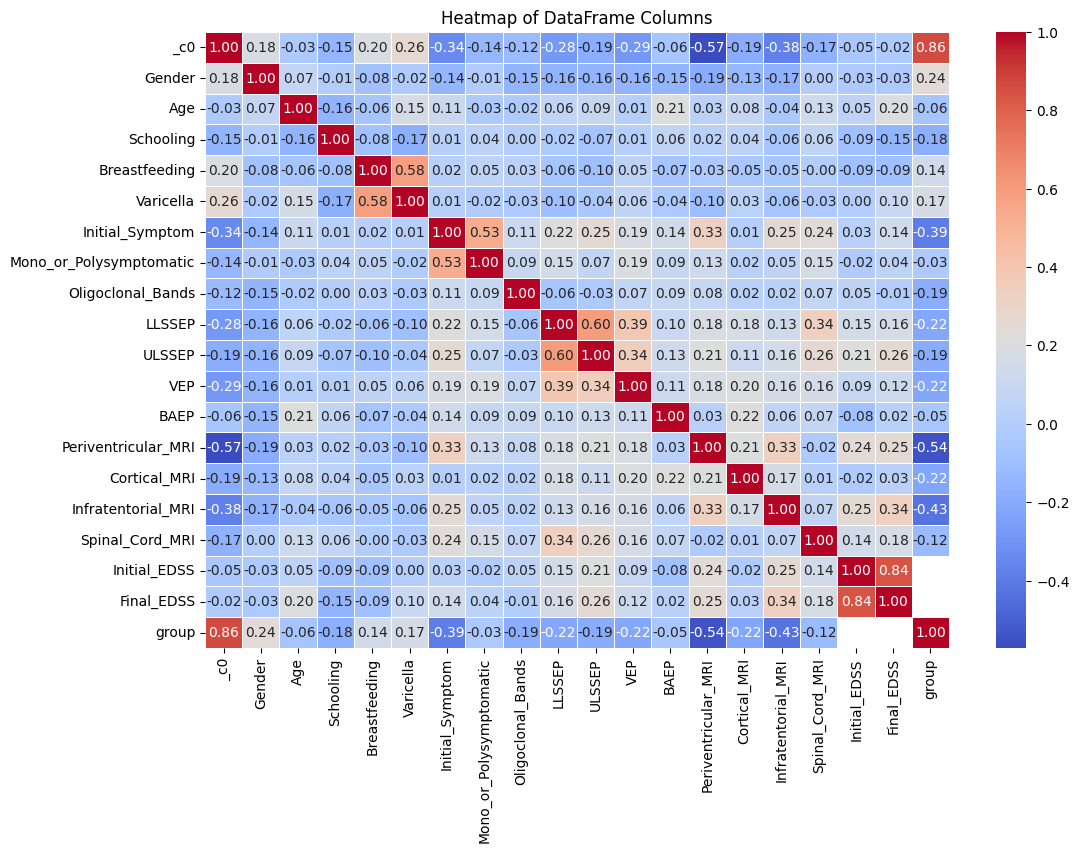

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df.toPandas()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pandas.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of DataFrame Columns')
plt.show()


## Display a Histogram of Correlated Features:
- There is about 50% more female than males in the dataset
- Age has some outliers in the above 55 range
- About 50% more rows with monosymptomatic over polysymptomatic
- BAEP is highly skewed to negative values
- Varicella has about 15% unknowns

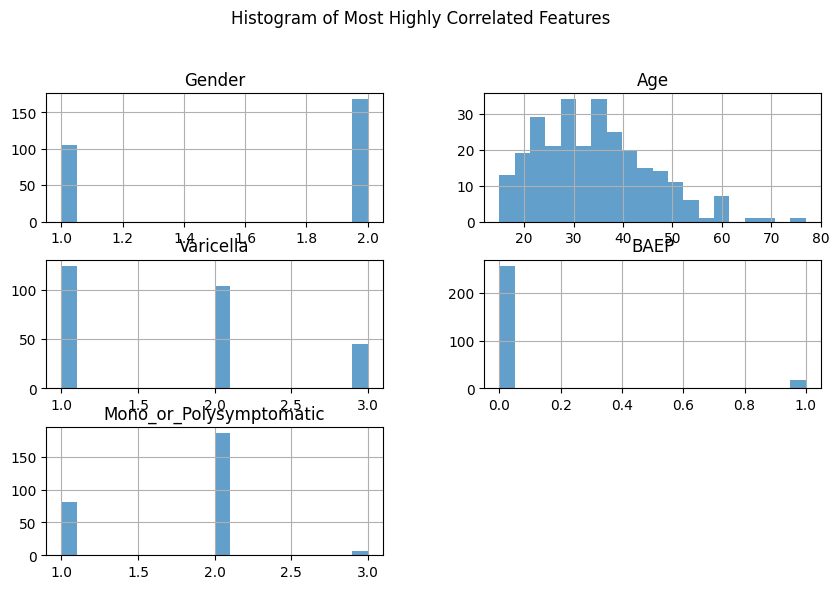

In [ ]:
# Select the more highly correclated features to plot
selected_features = ['Gender', 'Age', 'Varicella', 'BAEP', 'Mono_or_Polysymptomatic' ]

# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df.select(selected_features).toPandas()

# Plot histograms
df_pandas.hist(figsize=(10, 6), bins=20, alpha=0.7)
plt.suptitle('Histogram of Most Highly Correlated Features', y=1.02)
plt.show()

# Section 2: Clean the data
- Remove columns not useful for predicting MS (described initial in feature analysis table above)
- Remove rows with null values
- Remove rows with 'unknown' as a value


In [ ]:
from pyspark.sql.functions import col
#Clean the Data

num_rows_before = df.count()
print("Number of rows before cleaning:", num_rows_before)


# Number of columns that are not useful for our model
#columns_to_drop = ["_c0", "Initial_EDSS", "Final_EDSS", "Schooling", "Breastfeeding", "Mono_or_Polysymptomatic"]
columns_to_drop = ["_c0", "Initial_EDSS", "Final_EDSS", "Schooling", "Breastfeeding", "Initial_Symptom"]

df_cleaned = df.drop(*columns_to_drop)

# Drop rows with any missing values
df_cleaned = df_cleaned.dropna()

# Filter out rows with unknown values
df_cleaned = df_cleaned.filter(
    (col("Varicella") != 3) &
    (col("Mono_or_Polysymptomatic") != 3) &
    (col("Oligoclonal_Bands") != 2)
)

# Number of rows after cleaning
num_rows_after = df_cleaned.count()
print("Number of rows after cleaning:", num_rows_after)

# Display the cleaned DataFrame schema
df_cleaned.printSchema()

Number of rows before cleaning: 273
Number of rows after cleaning: 219
root
 |-- Gender: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Varicella: integer (nullable = true)
 |-- Mono_or_Polysymptomatic: integer (nullable = true)
 |-- Oligoclonal_Bands: integer (nullable = true)
 |-- LLSSEP: integer (nullable = true)
 |-- ULSSEP: integer (nullable = true)
 |-- VEP: integer (nullable = true)
 |-- BAEP: integer (nullable = true)
 |-- Periventricular_MRI: integer (nullable = true)
 |-- Cortical_MRI: integer (nullable = true)
 |-- Infratentorial_MRI: integer (nullable = true)
 |-- Spinal_Cord_MRI: integer (nullable = true)
 |-- group: integer (nullable = true)



# Section 3: Transform the clean data
- Use UDF to create a new column to replace Age called 'Age_Group' with categorized age values of "child", "adult", or "senior"
- Use UDF to create a new column called "Total_MRI_Abnormalities" that combines the values in columns "Periventricular_MRI", "Cortical_MRI", "Infratentorial_MRI", and "Spinal_Cord_MRI"



In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, IntegerType
from pyspark.sql import functions as F

# Define UDF for categorizing age into groups
def categorize_age(age):
    if age < 18:
        return "Child"
    elif age < 65:
        return "Adult"
    else:
        return "Senior"

# Define UDF to compute the sum of MRI abnormalities
def sum_mri_abnormalities(*args):
    return sum(args)

# Register UDFs
categorize_age_udf = udf(categorize_age, StringType())
sum_mri_abnormalities_udf = F.udf(sum_mri_abnormalities, IntegerType())

# Add "Age_Group" column using UDF
df_cleaned = df_cleaned.withColumn("Age_Group", categorize_age_udf("Age"))

# Add "Total_MRI_Abnormalities" column using UDF
df_cleaned = df_cleaned.withColumn("Total_MRI_Abnormalities", sum_mri_abnormalities_udf(
    "Periventricular_MRI", "Cortical_MRI", "Infratentorial_MRI", "Spinal_Cord_MRI"
))

# filter Age and other MRI columns from our dataframe now that we replaced them with two new columns
columns_to_drop = ["Age", "Periventricular_MRI", "Cortical_MRI", "Infratentorial_MRI", "Spinal_Cord_MRI"]

df_cleaned = df_cleaned.drop(*columns_to_drop)

# Show the DataFrame with new columns
df_cleaned.show()


+------+---------+-----------------------+-----------------+------+------+---+----+-----+---------+-----------------------+
|Gender|Varicella|Mono_or_Polysymptomatic|Oligoclonal_Bands|LLSSEP|ULSSEP|VEP|BAEP|group|Age_Group|Total_MRI_Abnormalities|
+------+---------+-----------------------+-----------------+------+------+---+----+-----+---------+-----------------------+
|     1|        1|                      1|                0|     1|     1|  0|   0|    1|    Adult|                      2|
|     1|        2|                      2|                1|     1|     0|  1|   0|    1|    Adult|                      1|
|     1|        1|                      1|                1|     0|     0|  0|   0|    1|    Adult|                      1|
|     2|        1|                      2|                1|     0|     1|  1|   0|    1|    Adult|                      2|
|     2|        1|                      2|                0|     1|     0|  0|   0|    1|    Adult|                      1|
|     1|

## Transformation (cont.):
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables
- Create a pipeline to execute the transformations
- Fit and transform the training and test data

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

# Split the data into train/test sets (70% train, 30% test)
train_data, test_data = df_cleaned.randomSplit([0.7, 0.3], seed=42)

# Define relevant features
#relevant_features = ['Age_Group_index', 'Gender_onehot', 'Varicella_onehot', 'Initial_Symptom_onehot','Oligoclonal_Bands_onehot', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Total_MRI_Abnormalities']
relevant_features = ['Age_Group_index', 'Gender_onehot', 'Varicella_onehot', 'Mono_or_Polysymptomatic','Oligoclonal_Bands_onehot', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Total_MRI_Abnormalities']

# Define StringIndexer for Age_Group
indexer = StringIndexer(inputCol="Age_Group", outputCol="Age_Group_index").fit(df_cleaned)
train_data = indexer.transform(train_data)
test_data = indexer.transform(test_data)

# Create a vector assembler to combine relevant features into a single feature vector
vector_assembler = VectorAssembler(inputCols=relevant_features, outputCol="features")

# One-hot encode categorical variables
#categorical_cols = ['Gender', 'Varicella', 'Initial_Symptom', 'Oligoclonal_Bands']
categorical_cols = ['Gender', 'Varicella', 'Oligoclonal_Bands']
onehot_encoder = OneHotEncoder(inputCols=categorical_cols, outputCols=[f"{col}_onehot" for col in categorical_cols])

# Create a pipeline to execute the transformations
pipeline = Pipeline(stages=[onehot_encoder, vector_assembler])

# Fit and transform the training data
train_data_transformed = pipeline.fit(train_data).transform(train_data)

# Transform the test data
test_data_transformed = pipeline.fit(test_data).transform(test_data)

# Show the transformed training data
train_data_transformed.show()

# Show the transformed test data
test_data_transformed.show()


+------+---------+-----------------------+-----------------+------+------+---+----+-----+---------+-----------------------+---------------+-------------+----------------+------------------------+--------------------+
|Gender|Varicella|Mono_or_Polysymptomatic|Oligoclonal_Bands|LLSSEP|ULSSEP|VEP|BAEP|group|Age_Group|Total_MRI_Abnormalities|Age_Group_index|Gender_onehot|Varicella_onehot|Oligoclonal_Bands_onehot|            features|
+------+---------+-----------------------+-----------------+------+------+---+----+-----+---------+-----------------------+---------------+-------------+----------------+------------------------+--------------------+
|     1|        1|                      1|                0|     0|     0|  0|   0|    1|    Adult|                      2|            0.0|(2,[1],[1.0])|   (2,[1],[1.0])|           (1,[0],[1.0])|(12,[2,4,5,6,11],...|
|     1|        1|                      1|                0|     0|     0|  0|   0|    2|    Adult|                      1|         

# Section 4: Analysis of Data
- Fit the data to Random Forest Classifier Model
- Train the model
- Test the trained model and display accuracy results (81.67%)


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Fit Random Forest model on the transformed training data
rf_model = RandomForestClassifier(featuresCol="features", labelCol="group").fit(train_data_transformed)

# Evaluate model on test data
predictions = rf_model.transform(test_data_transformed)

# Evaluate model performance using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="group", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy:", accuracy)




Test Accuracy: 0.8166666666666667


## Analysis of Data (cont.):
- Look at Feature Importance
- Perform and Display Clustering on the test data using KMeans


                    Feature  Importance
9   Total_MRI_Abnormalities    0.444481
4  Oligoclonal_Bands_onehot    0.229174
1             Gender_onehot    0.099697
7                       VEP    0.048484
3   Mono_or_Polysymptomatic    0.046574
6                    ULSSEP    0.037346
5                    LLSSEP    0.033610
8                      BAEP    0.031723
2          Varicella_onehot    0.021184
0           Age_Group_index    0.007728


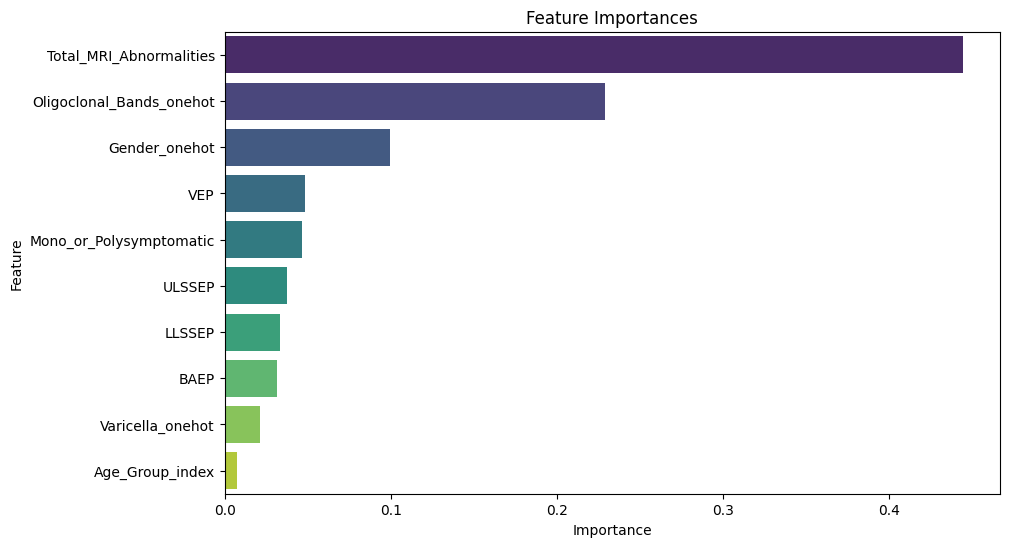

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.featureImportances

# Extract non-zero values from the SparseVector
non_zero_values = feature_importances.values

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({"Feature": relevant_features, "Importance": non_zero_values})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print or visualize the top features
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, hue="Feature", palette="viridis", legend=False)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

# Perform clustering on the test data using KMeans
kmeans_model = KMeans(featuresCol="features", predictionCol="cluster_prediction").fit(predictions)
clustered_data = kmeans_model.transform(predictions)

# Convert Spark DataFrame to Pandas DataFrame for plotting
clustered_data_pd = clustered_data.toPandas()



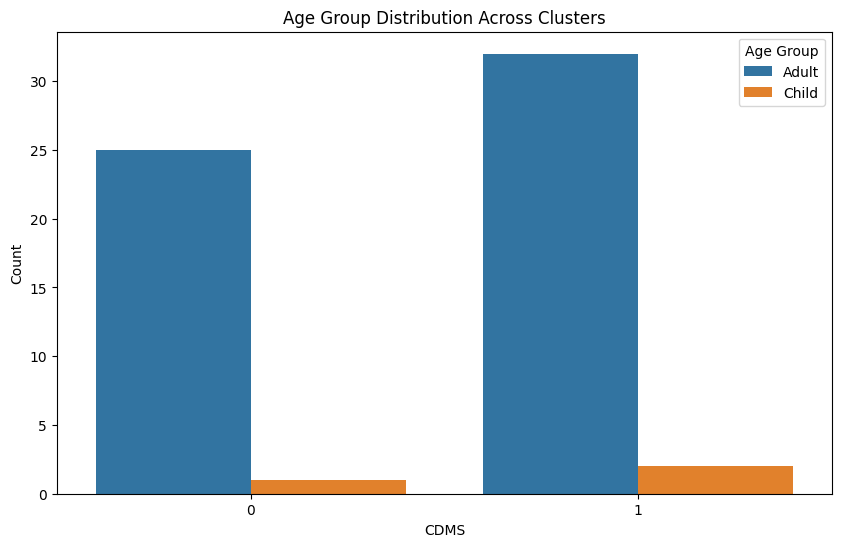

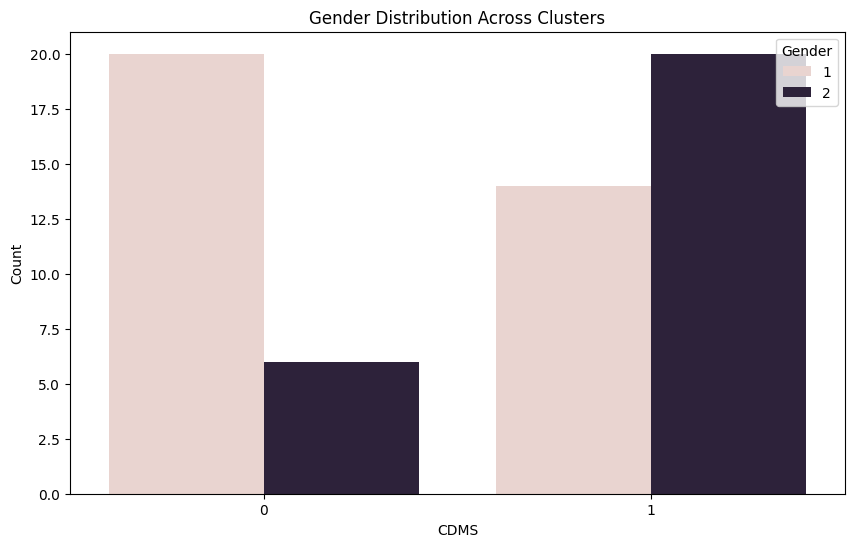

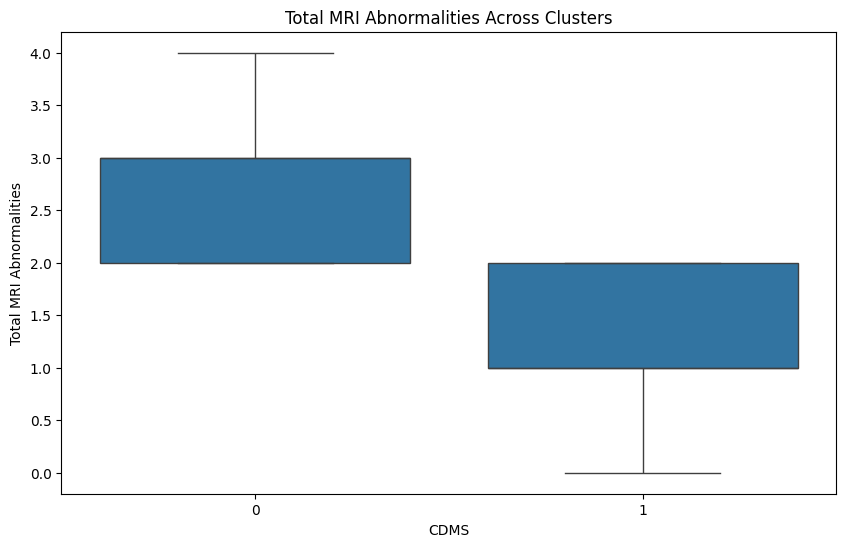

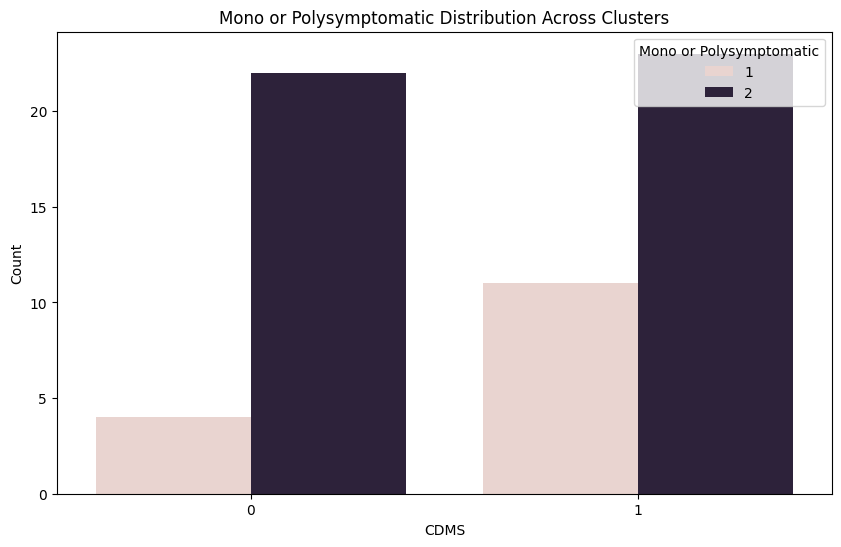

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting age group distribution across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_prediction', hue='Age_Group', data=clustered_data_pd)
plt.title('Age Group Distribution Across Clusters')
plt.xlabel('CDMS')
plt.ylabel('Count')
plt.legend(title='Age Group', loc='upper right')
plt.show()

# Plotting gender distribution across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_prediction', hue='Gender', data=clustered_data_pd)
plt.title('Gender Distribution Across Clusters')
plt.xlabel('CDMS')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()

# Plotting total MRI abnormalities across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_prediction', y='Total_MRI_Abnormalities', data=clustered_data_pd)
plt.title('Total MRI Abnormalities Across Clusters')
plt.xlabel('CDMS')
plt.ylabel('Total MRI Abnormalities')
plt.show()

# Plotting mono or polysymptomatic distribution across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_prediction', hue='Mono_or_Polysymptomatic', data=clustered_data_pd)
plt.title('Mono or Polysymptomatic Distribution Across Clusters')
plt.xlabel('CDMS')
plt.ylabel('Count')
plt.legend(title='Mono or Polysymptomatic', loc='upper right')
plt.show()


In [ ]:
# Stop the SparkSession
spark.stop()

## Final Conclusions and Recommendations:
In conclusion, the Random Forest model trained on the Kaggle Multiple Sclerosis Disease Conversion Predictors of Clinically Isolated Syndrome (CIS) to Multiple Sclerosis data showed promising accuracy, achieving an 81.67% success rate in predicting disease conversion. Notably, key features such as Total_MRI_Abnormalities, Oligoclonal_Bands, and ULSSEP emerged as significant predictors, with Total_MRI_Abnormalities displaying the highest feature importance at 0.53.  The analysis revealed intriguing insights into the distribution of features across gender clusters, indicating that while males showed relatively even distributions, females were three times more likely to receive a clinical diagnosis of MS.  Individuals with Total MRI Abnormalities numbering two or more were consistently diagnosed with MS, highlighting the prognostic value of this feature. Finally, polysymptomatic individuals were nearly four times more likely to receive a clinical MS diagnosis, underlining the importance of considering symptomatology in disease progression.

Moving forward, leveraging these insights could enhance early detection strategies and inform personalized treatment approaches for individuals at risk of MS conversion.   Future work could be to explore the underlying mechanisms driving gender disparities in MS diagnosis and investigation of the MRI Abnormalities.  I suspect that one of the MRI specific abnormalities may weigh more heavily than the other three.  More importantly, integration of machine learning techniques with clinical practice should be explored to optimize patient outcomes and advance our understanding of MS progression.


